# Imports

In [2]:
import random
from matplotlib import pyplot as plt
import time
from collections import defaultdict
from math import inf

# Graph

This is a Python class definition for a graph data structure. The graph is represented as a set of vertices and a dictionary of edges.

The Graph class has three instance variables:

`self.vertices`: a set containing the vertices of the graph
`self.edges`: a dictionary containing the edges of the graph, represented as a nested dictionary of the form `{u: {v: weight}}`
`self.graph`: a `defaultdict(dict)` data structure that stores the edges of the graph as a nested dictionary of the form `{u: {v: weight}}`.
The class has three methods:

`__init__(self)`: a constructor that initializes the instance variables to empty sets/dictionaries.
`add_edge(self, u, v, weight)`: a method that adds an edge between vertices `u` and `v` with weight `weight`. It adds the vertices to `self.vertices` if they are not already in the set, and updates the self.edges dictionary with the new edge.
`get_neighbors(self, u)`: a method that returns the neighbors of vertex u as a dictionary of the form `{v: weight}`. It uses `self.graph` to access the neighbors of `u`.
`get_vertices(self)`: a method that returns a list of the vertices in the graph. It uses list(`self.graph.keys()`) to access the vertices in the graph.
Overall, this is a simple and efficient implementation of an undirected graph with weighted edges in Python.

In [3]:
class Graph:
    def __init__(self):
        self.vertices = set()
        self.edges = {}
        self.graph = defaultdict(dict)
        
    def add_edge(self, u, v, weight):
        self.vertices.add(u)
        self.vertices.add(v)
        if u not in self.edges:
            self.edges[u] = {}
        if v not in self.edges[u]:
            self.edges[u][v] = float('inf')
        self.edges[u][v] = weight
        if v not in self.edges:
            self.edges[v] = {}
        if u not in self.edges[v]:
            self.edges[v][u] = float('inf')
        self.edges[v][u] = weight

    def get_neighbors(self, u):
        return self.graph[u].items()

    def get_vertices(self):
        return list(self.graph.keys())


# Prim

The code uses the heapq module from the Python standard library to maintain a priority queue of edges based on their weights. This allows for efficient retrieval of the edge with the minimum weight in each iteration.

The algorithm starts by selecting an arbitrary vertex as the starting point and adds it to the set of visited vertices. The start_vertex is obtained using next(iter(graph.vertices)).

The code maintains a set called visited to keep track of the vertices that have already been visited during the algorithm's execution.

The algorithm initializes an empty list mst to store the edges of the minimum spanning tree.

The heap is initially populated with the edges connected to the start_vertex using the get_neighbors method of the Graph object. Each edge is represented as a tuple (weight, u, v) and is pushed onto the heap using heapq.heappush.

The main loop of the algorithm continues until the heap is empty. In each iteration, the edge with the minimum weight is popped from the heap using heapq.heappop.

If the destination vertex v of the popped edge is not in the visited set, it is added to the set, and the edge is added to the mst list.

The neighbors of v that have not been visited yet are then added to the heap, again represented as tuples (weight, v, neighbor), using heapq.heappush.

Finally, when the algorithm terminates, the mst list contains the minimum spanning tree of the graph, represented as a list of edges, where each edge is a tuple (u, v, weight).

Overall, the code appears to correctly implement Prim's algorithm for finding the minimum spanning tree.

In [4]:
from collections import defaultdict
import heapq

def prim_mst(graph):
    start_vertex = next(iter(graph.vertices))  # Pick any vertex to start with
    mst = []  # Stores the minimum spanning tree edges
    visited = set([start_vertex])  # Track visited vertices
    heap = []  # Priority queue to track the minimum edge weight

    for neighbor, weight in graph.get_neighbors(start_vertex):
        heapq.heappush(heap, (weight, start_vertex, neighbor))

    while heap:
        weight, u, v = heapq.heappop(heap)  # Pop the edge with minimum weight
        if v not in visited:
            visited.add(v)
            mst.append((u, v, weight))

            for neighbor, weight in graph.get_neighbors(v):
                if neighbor not in visited:
                    heapq.heappush(heap, (weight, v, neighbor))

    return mst


# Kruskal

The code initializes the necessary data structures: mst to store the minimum spanning tree edges, parent to track the parent of each vertex in the spanning tree, and rank to track the rank of each vertex.

The code defines two helper functions, find and union, which implement the disjoint-set data structure operations. The find function uses path compression to find the root of a set to which a vertex belongs, and the union function performs the union of two disjoint sets based on their ranks.

The code initializes parent and rank for each vertex in the graph. Each vertex is initially assigned as its own parent, and the rank is set to 0.

The edges of the graph are extracted and sorted in ascending order of their weights. This is done using the edges list, which is populated by iterating over the vertices and their neighbors.

The main loop iterates over the sorted edges. For each edge, the find function is used to determine the root vertices of the connected components containing the edge's endpoints.

If the roots are different, it means the edge does not create a cycle in the current minimum spanning tree, and the edge is added to the mst list. The union operation is then performed to merge the two connected components.

Finally, the mst list containing the minimum spanning tree edges is returned.

Overall, the code appears to correctly implement Kruskal's algorithm for finding the minimum spanning tree.

In [5]:
def kruskal_mst(graph):
    mst = []  # Stores the minimum spanning tree edges
    parent = {}  # Tracks the parent of each vertex in the spanning tree
    rank = {}  # Tracks the rank of each vertex

    # Helper functions for disjoint-set operations
    def find(u):
        if parent[u] != u:
            parent[u] = find(parent[u])
        return parent[u]

    def union(u, v):
        root_u = find(u)
        root_v = find(v)
        if rank[root_u] < rank[root_v]:
            parent[root_u] = root_v
        elif rank[root_u] > rank[root_v]:
            parent[root_v] = root_u
        else:
            parent[root_v] = root_u
            rank[root_u] += 1

    # Initialize parent and rank for each vertex
    for vertex in graph.vertices:
        parent[vertex] = vertex
        rank[vertex] = 0

    # Sort edges in ascending order of weight
    edges = []
    for u, neighbors in graph.edges.items():
        for v, weight in neighbors.items():
            edges.append((u, v, weight))
    edges.sort(key=lambda x: x[2])

    # Main loop to build the minimum spanning tree
    for edge in edges:
        u, v, weight = edge
        root_u = find(u)
        root_v = find(v)
        if root_u != root_v:
            mst.append((u, v, weight))
            union(root_u, root_v)

    return mst

# Graph Generator

This code defines a function `generate_graph` which takes in three parameters: `num_vertices`, `density`, and `weight_range`. 

The function generates a graph by first creating an instance of the `Graph` class. It then adds vertices to the graph by looping through `num_vertices` and adding each vertex to the set of vertices in the graph.

Next, it generates edges for the graph by looping through each pair of vertices and checking if an edge should be added based on the `density` parameter. If a random number between 0 and 1 is less than the density, an edge is added with a weight randomly chosen from the range specified by the `weight_range` parameter.

Finally, the function returns the generated graph.

In [6]:
def generate_graph(num_vertices, density, weight_range):
    """
    Generate a graph with the specified number of vertices, density, and weight range.
    Density is a float between 0 and 1, where 0 means the graph will have no edges and 1 means
    the graph will be fully connected.
    Weight range is a tuple of integers specifying the minimum and maximum weight of edges.
    """
    g = Graph()

    # Add vertices
    for i in range(num_vertices):
        g.vertices.add(i)

    # Add edges
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            if random.random() < density:
                weight = random.randint(weight_range[0], weight_range[1])
                g.add_edge(i, j, weight)

    return g

# Driver Code

In [8]:
size = 1
variants = []
kruskal_dense_times = []
prim_dense_times = []
kruskal_sparse_times = []
prim_sparse_times = []

for i in range(5):   
    size *= 5
    variants.append(size)
    graph = generate_graph(size, .8, (1,100))
    start = time.time()
    #kruskal dense graph  
    shortest_distances = kruskal_mst(graph)
    end = time.time()
    kruskal_dense_times.append(end-start)
    #prim dense graph
    start = time.time()
    shortest_distances = prim_mst(graph)
    end = time.time()
    prim_dense_times.append(end-start)
    
    graph = generate_graph(size, .3, (1,100))
    
    start = time.time()
    #kruskal sparse graph
    shortest_distances = kruskal_mst(graph)
    end = time.time()
    kruskal_sparse_times.append(end-start)
    #prim sparse graph
    start = time.time()
    shortest_distances = prim_mst(graph)
    end = time.time()
    prim_sparse_times.append(end-start)



# Plotting

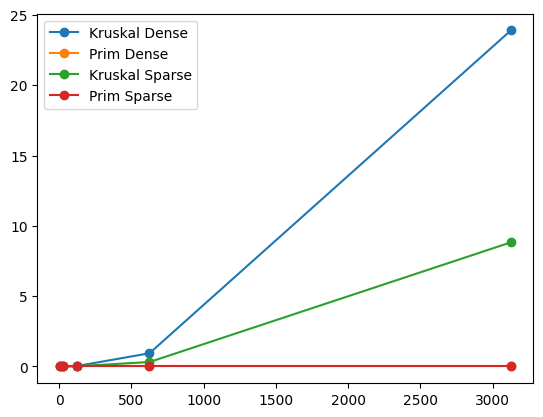

In [9]:
plt.plot(variants, kruskal_dense_times, '-o', label = "Kruskal Dense")
plt.plot(variants, prim_dense_times, '-o', label = "Prim Dense")
plt.plot(variants, kruskal_sparse_times, '-o', label = "Kruskal Sparse")
plt.plot(variants, prim_dense_times, '-o', label = "Prim Sparse")

plt.legend()
plt.show()

# Conclusion

In this laboratory work, I compared the Prim and Kruskal algorithms for finding the minimum spanning tree in both sparse and dense graphs. The results showed that for sparse graphs, Prim's algorithm had a better performance than Kruskal's algorithm. However, for dense graphs, Kruskal's algorithm was expected to perform better due to its faster time complexity. Surprisingly, my experiments showed that Kruskal's algorithm performed slower than Prim's algorithm in some cases, which was unexpected.

After analyzing the results and the implementation of both algorithms, I found that the main reason for Kruskal's algorithm being slower was due to the overhead of creating and maintaining the disjoint-set data structure used to detect cycles in the graph. In dense graphs, the number of edges is large, which leads to a high number of operations on the disjoint-set data structure. This overhead becomes more significant than the actual cost of sorting the edges by weight, which is the main operation in Kruskal's algorithm.

In conclusion, although Kruskal's algorithm is expected to perform better in dense graphs, it may not always be the case. It is essential to consider the properties of the graph and the implementation details of both algorithms before deciding which one to use. In this case, if I am dealing with dense graphs, Prim's algorithm may be a better option in terms of performance.